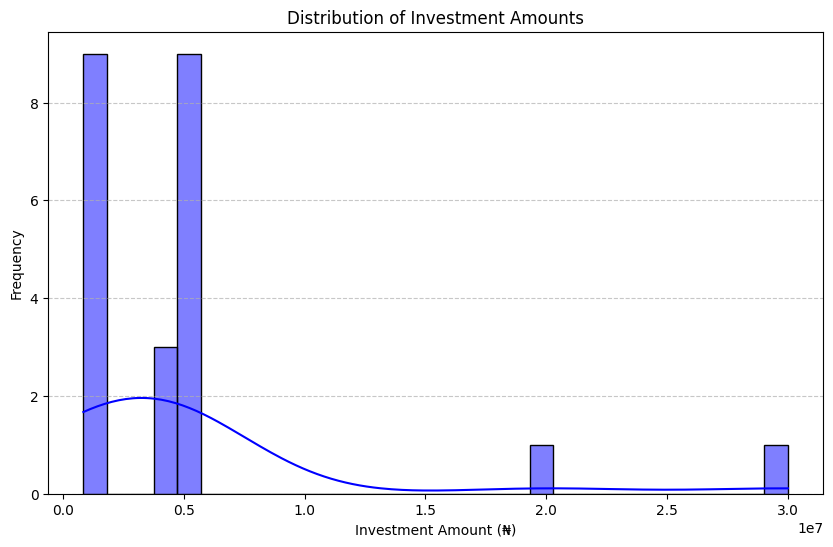

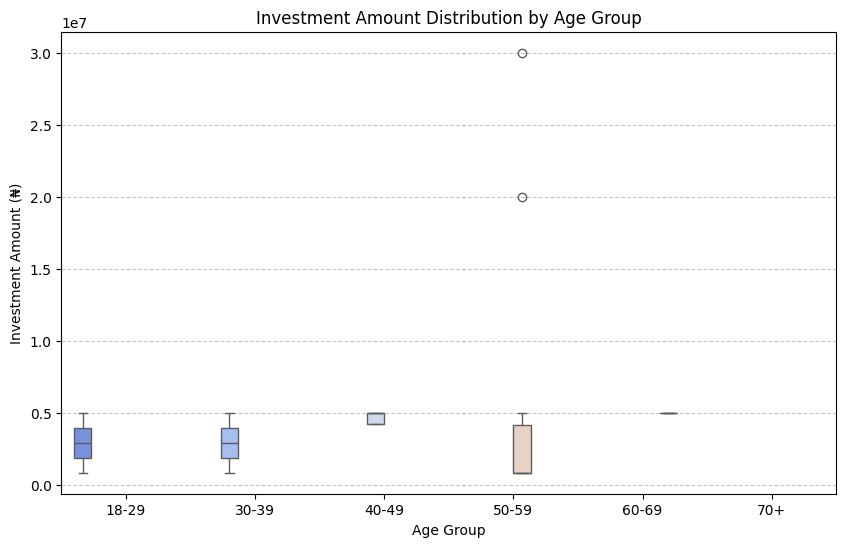

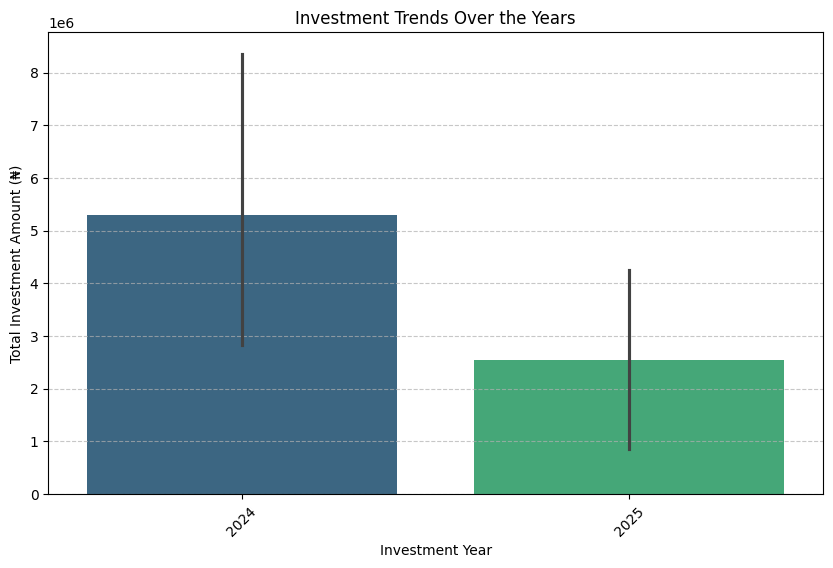

Unique Investment Months: ['JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER', 'JANUARY']
Categories (7, object): ['JULY' < 'AUGUST' < 'SEPTEMBER' < 'OCTOBER' < 'NOVEMBER' < 'DECEMBER' < 'JANUARY']


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load the Excel file
df = pd.read_excel("processed_investment_data.xlsx")

# Select relevant columns
columns_to_keep = ['DOB', 'INVESTMENT YEAR', 'INVESTMENT MONTH', 'LAND', 'UNIT', 'AMOUNT']
df = df[columns_to_keep].copy()

# Convert DOB to datetime format and calculate age
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df['AGE'] = df['DOB'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)

# Ensure investment months are ordered correctly
month_order = ['JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER', 'JANUARY']
df['INVESTMENT MONTH'] = pd.Categorical(df['INVESTMENT MONTH'], categories=month_order, ordered=True)

# Convert UNIT and AMOUNT to numeric
df['UNIT'] = pd.to_numeric(df['UNIT'], errors='coerce')
df['AMOUNT'] = pd.to_numeric(df['AMOUNT'], errors='coerce')

df = df.dropna()

# Define age groups
bins = [18, 30, 40, 50, 60, 70, 100]
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70+"]
df["AGE GROUP"] = pd.cut(df["AGE"], bins=bins, labels=labels, right=False)

# Group by Age Group and sum Amount
age_amount_df = df.groupby("AGE GROUP")["AMOUNT"].sum().reset_index()

# Additional Visualization: Distribution of Investments
plt.figure(figsize=(10, 6))
sns.histplot(df["AMOUNT"], bins=30, kde=True, color="blue")
plt.xlabel("Investment Amount (₦)")
plt.ylabel("Frequency")
plt.title("Distribution of Investment Amounts")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Additional Visualization: Boxplot for Age vs. Investment Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["AGE GROUP"], y=df["AMOUNT"], palette="coolwarm", hue=df["AGE GROUP"], legend=False)
plt.xlabel("Age Group")
plt.ylabel("Investment Amount (₦)")
plt.title("Investment Amount Distribution by Age Group")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Additional Visualization: Investment Amount by Investment Year
plt.figure(figsize=(10, 6))
sns.barplot(x=df["INVESTMENT YEAR"].astype(str), y=df["AMOUNT"], palette="viridis", hue=df["INVESTMENT YEAR"].astype(str), legend=False)
plt.xlabel("Investment Year")
plt.ylabel("Total Investment Amount (₦)")
plt.title("Investment Trends Over the Years")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Check if all months are present
print("Unique Investment Months:", df["INVESTMENT MONTH"].unique())
